# Projeto - Lançamento de um novo produto - Simulação de Sistemas UnB 
o projeto que antes consistia em um programa em MATLAB, foi traduzido para Python. 
O projeto solicitado, envolve uma simulação para realizar uma análise de riscos para uma empresa. Tal empresa pretende lançar uma impressora nova no mercado e com o levantamento feito incialmente com parâmetros fixos e constantes, pretende realizar uma previsão de lucro, receita e custos para a analisar a viabilidade desse novo produto dentro do mercado. Sendo assim, a análise foi realizada em 3 etapas: 


1.   Previsão de Custos,Receita e Lucro para parâmetros constantes, ou seja, todas as variáveis que envolvem os custos com pessoal, fabricação, partes, marketing, preço de venda, demanda são fixas. 
2.   Modelando com incertezas envolvendo as variáveis de custo com pessoal, dada por uma distribuição de probabilidade presente na proposta do projeto, a demanda corresponde a uma normal com média $\mu = 15$ e desvio padrão $\sigma = 4,5$. Já o custo com partes corresponde a uma distruição uniforme com valor mínimo $80$ e valor máximo $100$.
3.   Modelando com variações no preço de venda e elasticidade da demanda, considerando apenas o custo por partes como uma variável randômica. 


# Modelando Matematicamente o nosso problema
Primeiramente, devemos considerar que estamos lidando com funções até bastante simples, porém é necessário antes organizar todo o raciocínio para que a compreensão dos resultados e dos códigos não seja afetada. 

Dessa forma podemos separar os custos descritos em dois grupos, os custos por unidade (Custos por pessoal, $ C_{pessoal}$,  e custos por partes $C_{partes}$. Também temos custos que não dependem da quantidade como o custo de propaganda ($C_{propaganda}$) e o custo administrativo ($C_{administrativo}$) . 

Assim podemos modelar o nosso Custo Total ($C_t$) como: 
\begin{equation}
    C_t = D \cdot (C_{partes} + C_{pessoal}) + C_{propaganda} + C_{administrativo}
\end{equation}
Em que $D$ corresponde a quantidade demandada da impressora. 

Para a receita, iremos considerar o preço de venda $p$ e a demanda, sendo assim: 
\begin{equation}
    R = p \cdot D
\end{equation}

Por fim, o lucro $L$, é definido como a diferença entre a Receita $R$ e os Custos Totais $C_t$:
\begin{equation}
    L = R - C_t
\end{equation}
A partir dessas $3$ equações, iremos descrever a viabilidade econômica desse produto para a empresa, adaptando a cada contexto da simulação. 


In [ ]:
#Importando Bibliotecas necessárias 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.stats import uniform

In [ ]:
# Configurando o plot para ele sair em alta definição 
plt.rcParams['figure.dpi'] = 100

## Letra A - Simulação com Parâmetros fixos 
Para essa simulação, o nosso código só precisou ser executado uma única vez, o objetivo aqui é compreender o lucro potencial que essa impressora pode gerar para a empresa, se ela for lançada no mercado.

In [108]:
#Primeiramente iremos definir as nossas variáveis 
#Definindo nossa matriz de custos por unidade
custos_fab = 150 #Soma do Custo por Partes e Custo com Pessoal dado que esses são por unidade
custo_adm = 400
custo_propaganda = 600
#Definindo a demanda 
demanda = 15000
#Definindo as receitas 
preco_venda = 249 
receita = demanda*preco_venda
#Calculando os custos 
Custo_Total = demanda*(custos_fab) + custo_adm + custo_propaganda
#Calculando o lucro potencial 
lucro = receita - Custo_Total 
print("O lucro é: ",lucro,"$")
print("A receita é: ",receita,"$")
print("O custo total é: ",Custo_Total,"$")

O lucro é:  1484000 $
A receita é:  3735000 $
O custo total é:  2251000 $


# Letra B - Modelando com Incertezas nas variáveis Custo com pessoal, Demanda e Custo para as partes
Agora para essa modelagem, foi necessário gerar uma variável randômica $X$ dada por uma distribuição uniforme que vai de 0 até 1, ou seja: 
\begin{equation}
    X \sim U(0,1)
\end{equation}
Para indexarmos a variável de custo pessoal, variável essa que é dada por uma distribuição de probabilidades expressa na seguinte tabela: 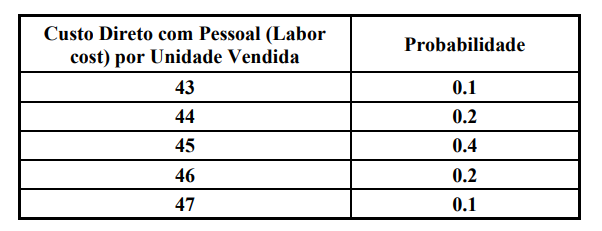


A demanda ($D$) por sua vez, dentro desse contexto é dada por uma normal com média $\mu = 15$ e desvio padrão $\sigma = 4,5$. Assim:
\begin{equation}
    D \sim N(15,4,5)
\end{equation}
Já o custo com partes ($C_{partes}$) corresponde a uma distruição uniforme com valor mínimo $80$ e valor máximo $100$, logo: 
\begin{equation}
    C_{partes} \sim U(80,100)
\end{equation}
Dessa forma, foi montado o seguinte código em MATLAB para simular qual seria o lucro máximo, mínimo, médio e qual a probabilidade dadas essas distribuições de a empresa incorrer em prejuízo


In [109]:
#Modelando com incertezas - Definindo todas as nossas variáveis 
#Primeiramente iremos indexar a nossa variável custo pessoal a um número randômico x 
n = 100000
X = np.random.uniform(0,1,n)
custo_pessoal_lista = []
for x in X:
  if x <= 0.4:
    custo_pessoal = 45
    custo_pessoal_lista.append(custo_pessoal)
  elif x <= 0.6:
    custo_pessoal = 44
    custo_pessoal_lista.append(custo_pessoal)
  elif x <= 0.8:
    custo_pessoal = 46
    custo_pessoal_lista.append(custo_pessoal)
  elif  x <= 0.9:
    custo_pessoal = 43
    custo_pessoal_lista.append(custo_pessoal)
  else:
    custo_pessoal = 47
    custo_pessoal_lista.append(custo_pessoal)
#o Custo por partes é dado por uma uniforme que vai de 80 a 100 
custo_partes = np.random.uniform(80,100,n)
#A demanda é dada por uma normal com média 15 e desvio padrao 4,5 
demanda = norm.rvs(size=n,loc=15,scale=4.5)
#Transformando nossa lista de custo pessoal em uma array 
custo_pessoal = np.array(custo_pessoal_lista)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequência'),
 Text(0.5, 0, 'Variavel X que indexa o Custo com Pessoal dado por uma uniforme $U(0,1)$')]

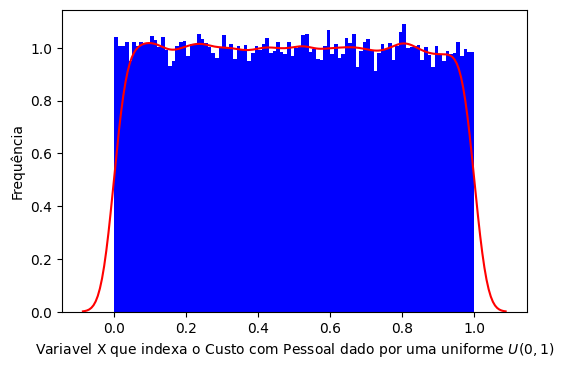

In [110]:
ax = sns.distplot(X,
                  bins=100,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1,'color':'blue'})
ax.set(xlabel='Variavel X que indexa o Custo com Pessoal dado por uma uniforme $U(0,1)$', ylabel='Frequência')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequência'),
 Text(0.5, 0, 'Distribuição da Variável Custo com Pessoal')]

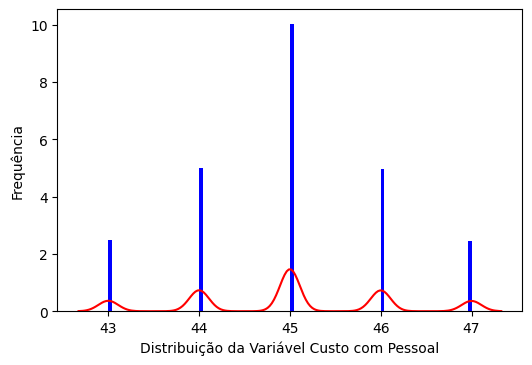

In [111]:
ax = sns.distplot(custo_pessoal,
                  bins=100,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1,'color':'blue'})
ax.set(xlabel='Distribuição da Variável Custo com Pessoal', ylabel='Frequência')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequência'),
 Text(0.5, 0, 'Demanda dada por uma Normal $N(15,4.5)$')]

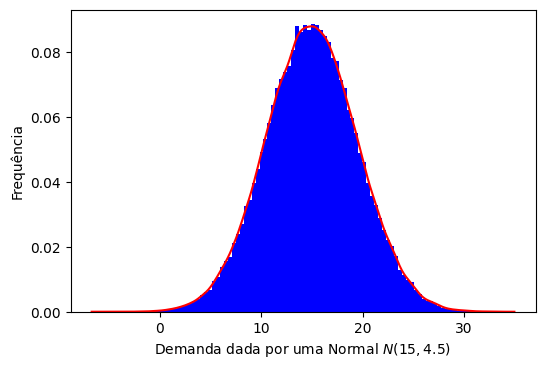

In [112]:
ax = sns.distplot(demanda,
                  bins=100,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1,'color':'blue'})
ax.set(xlabel='Demanda dada por uma Normal $N(15,4.5)$', ylabel='Frequência')

In [113]:
#Calculando o lucro 
#Soma dos Custos Totais por Unidade (Custo com pessoal e custo por partes)
custos_totais_por_unidade=[]
for x,y in enumerate(custo_pessoal): # Percorre o Array a enumerando suas posições
  custos_totais_por_unidade.append(y+custo_partes[x]) # somando elemento do array a com o elemento de mesma posição no array B
print(custos_totais_por_unidade)
#Calculo do Custo Total 
custo_adm = 400
custo_propaganda = 600
Ct =  demanda*custos_totais_por_unidade + custo_adm + custo_propaganda
#Cálculo da Receita 
preco_venda = 249 
R = preco_venda*demanda 
#Cálculo do Lucro 
L = R - Ct
#Cálculo do Lucro Máximo, Minimo e Médio 
lucro_medio = np.mean(L)
lucro_maximo = np.amax(L)
lucro_minimo = np.amin(L)
print('O lucro mínimo é',lucro_minimo,"$")
print('O lucro maximo é',lucro_maximo,"$")
print('O lucro médio é',lucro_medio,"$")
#Cálculo da Probabiliadde de Prejuizo 
n = 1000000
contador = 0
for l in L:
  if l < 0:
    contador = contador + 1
Prob = (contador/n)*100
print("A probabilidade da empresa incorrer em prejuízo é de",Prob,"%")

[135.9831849449273, 134.54907838084392, 131.2416155675836, 127.75584811878547, 137.48519362507585, 144.64382405963113, 142.77736173648992, 129.12442620881944, 144.12817685354653, 142.58940125277832, 139.7426028375283, 143.96017751427684, 138.54468706372202, 140.04505504372565, 125.15851371235902, 134.29277756744216, 145.31925445629986, 135.96707668578674, 142.7254476339827, 141.19798259788286, 126.86720889927524, 139.97752519355953, 142.4193288191955, 132.82191723433905, 134.06481797855145, 140.9300166115775, 126.78688518501218, 142.44899113299374, 138.7315133895183, 137.0837565044353, 126.8929592108832, 124.23439289769092, 126.00800115071307, 141.14254332507016, 141.90251302468624, 135.9564419323765, 134.25820771075826, 133.97141843156658, 139.73992569862952, 125.45701481729269, 137.39323073564537, 141.17946319265488, 126.12988772430357, 127.0260641564731, 142.8103594666604, 135.11383243183514, 126.34214575662814, 138.67873737053003, 134.8605001542802, 130.36275538019652, 129.79144885

# Letra C - Modelando com Elasticidade na Demanda e Variações no preço de venda
Nesta e última seção da simulação, consideramos para a simulação que a única variável randômica é o Custo por partes, dado anteriormente pela Uniforme que vai de 80 até 100. 

Assim as novas variáveis de Demanda e Custo com Pessoal são dadas pelas seguintes leis que levam em consideração a elasticidade da demanda. 

A taxa de elasticidade da demanda é dada por:
\begin{equation}
    \varepsilon = \left(\frac{p}{249}\right)^{-0,72}
\end{equation}
Em que $p$ é o preço de venda da impressora. 
Assim definimos a nova demanda da seguinte maneira, considerando como a demanda base $D$:
\begin{equation}
    D^{*} = D\cdot \varepsilon
\end{equation}
Dessa forma a variável Custo com Pessoal pode ser definida como:
\begin{equation}
    C_{pessoal}^{*} = C_{pessoal} \cdot \left(\frac{D^{*}}{D}\right)^{-2,2}
\end{equation}

In [114]:
#Para esse caso iremos definir um intervalo entre 230 e 270 para o preço 
P = np.linspace(200,600) #
demanda = []
custo_pessoal = []
tx_elasticidade_matriz = []
V = len(P) #Tamanho do vetor de preços
for p in P:
  tx_elasticidade = (p/249)**(-0.72)
  tx_elasticidade_matriz.append(tx_elasticidade)
for tx in tx_elasticidade_matriz:
  demanda_base = 15
  nva_demanda = demanda_base*tx
  demanda.append(nva_demanda)
demanda_array = np.array(demanda)
#Novo Custo com pessoal
for d in demanda_array:
  custo_pessoal_base = 45
  elasticidade_custo = (d/demanda_base)**(-2.2) #Elasticidade do Custo pessoal 
  nvo_custo_pessoal = custo_pessoal_base*elasticidade_custo
  custo_pessoal.append(nvo_custo_pessoal)
custo_pessoal_array = np.array(custo_pessoal)
#Custo por partes dado pela mesma forma que antes 
custo_partes = np.random.uniform(80,100,V)
# Calculo do Custo Total 
custo_adm = 400
custo_propaganda = 600
custos_totais_por_unidade = custo_pessoal_array + custo_partes
Ct =  demanda_array*custos_totais_por_unidade + custo_adm + custo_propaganda
#Cálculo da Receita 
R = P*demanda_array
#Cálculo do Lucro 
L = R - Ct

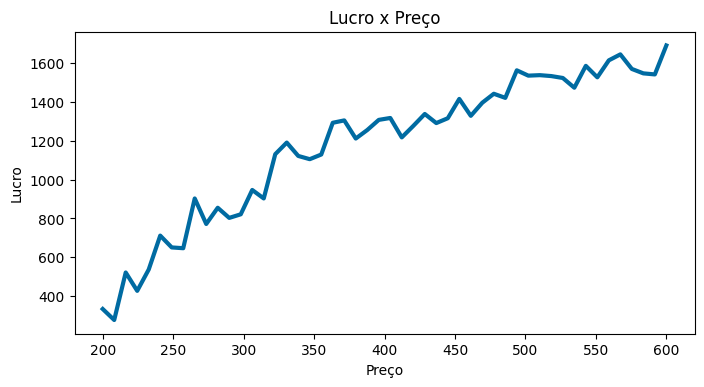

In [115]:
# Gerando o Gráfico de Lucro por Preço 
# Plotando o primeiro gráfico de teste 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados para os EUA
ax.plot(P,L,color='#006BA2',linewidth=3) #Azul
plt.title("Lucro x Preço", loc='center')
ax.set_ylabel("Lucro")
ax.set_xlabel("Preço")
plt.grid(False)
plt.show()